In [1]:
%pip install sidetable

In [2]:
import numpy as np
import pandas as pd
import sidetable

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import kelbow_visualizer

**Data Understanding**

In [3]:
df = pd.read_csv('/content/data.csv', encoding='latin1')

# Uma boa prática ao trabalhar com uma base desconhecida é calcular o nº de linhas e colunas para descobrir sua extensão
print(df.shape)
df.head()

(376093, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376093 entries, 0 to 376092
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    376093 non-null  object 
 1   StockCode    376093 non-null  object 
 2   Description  374820 non-null  object 
 3   Quantity     376093 non-null  int64  
 4   InvoiceDate  376093 non-null  object 
 5   UnitPrice    376092 non-null  float64
 6   CustomerID   277315 non-null  float64
 7   Country      376092 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.0+ MB


In [5]:
df.InvoiceNo .sort_values()

0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
375278    C569456
375277    C569456
375865    C569485
375866    C569485
375975    C569490
Name: InvoiceNo, Length: 376093, dtype: object

In [6]:
df[['Description','Country']].nunique()

Description    3987
Country          37
dtype: int64

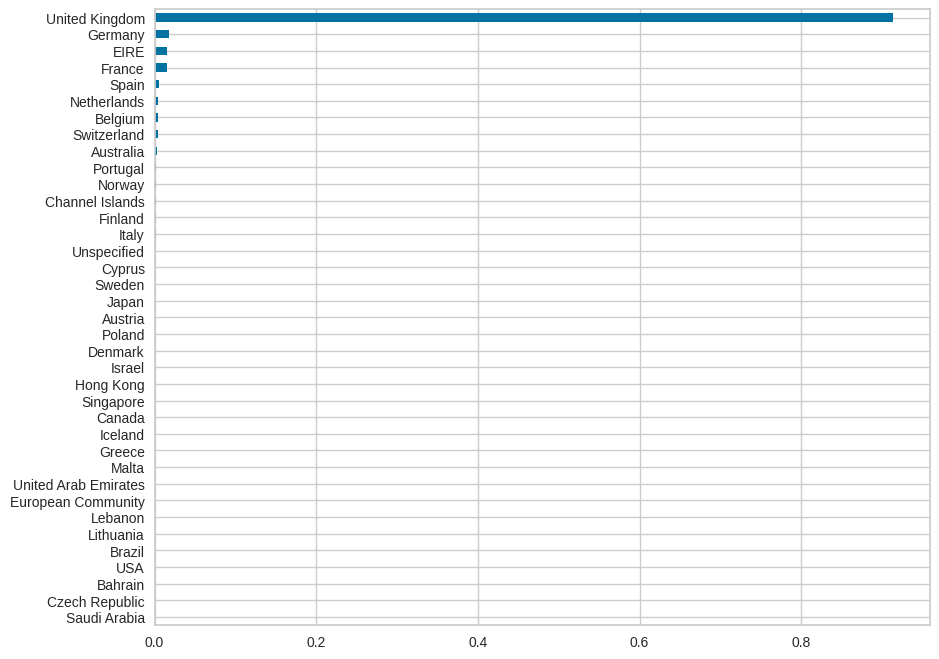

In [7]:
df['Country'].value_counts(normalize= True, ascending = True).plot.barh(figsize= (10,8));

In [8]:
df.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,343456,91.322336,343456,91.322336
1,Germany,6687,1.778022,350143,93.100358
2,EIRE,5834,1.551216,355977,94.651575
3,France,5827,1.549355,361804,96.200930
4,Spain,1828,0.486051,363632,96.686981
5,Netherlands,1781,0.473554,365413,97.160535
6,Belgium,1455,0.386873,366868,97.547409
7,Switzerland,1394,0.370654,368262,97.918063
8,Australia,1100,0.292482,369362,98.210544
9,Portugal,829,0.220425,370191,98.430969


In [9]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,376093.000000,376092.000000
mean,9.800618,4.774822
std,180.268374,106.348714
min,-74215.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,74215.000000,38970.000000


In [10]:
df.isna().sum().sort_values(ascending= False)

CustomerID     98778
Description     1273
UnitPrice          1
Country            1
InvoiceNo          0
StockCode          0
Quantity           0
InvoiceDate        0
dtype: int64

In [11]:
df.duplicated().sum()

2908

**Data Preparation**

Data Cleaning

In [12]:
# Como o customerID é fundamental para o calculo correto do RFM teremos que retirar os dados faltantes
df = df.dropna(subset= ['CustomerID'])
df.stb.missing()

,missing,total,percent
InvoiceNo,0,277315,0.0
StockCode,0,277315,0.0
Description,0,277315,0.0
Quantity,0,277315,0.0
InvoiceDate,0,277315,0.0
UnitPrice,0,277315,0.0
CustomerID,0,277315,0.0
Country,0,277315,0.0


In [13]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format= '%m/%d/%Y %H:%M')

<ipython-input-13-e9dc77dace7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format= '%m/%d/%Y %H:%M')


In [14]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['Country'] = df['Country'].astype('category')

<ipython-input-14-8861d7906295>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)
<ipython-input-14-8861d7906295>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].astype('category')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277315 entries, 0 to 376091
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    277315 non-null  object        
 1   StockCode    277315 non-null  object        
 2   Description  277315 non-null  object        
 3   Quantity     277315 non-null  int64         
 4   InvoiceDate  277315 non-null  datetime64[ns]
 5   UnitPrice    277315 non-null  float64       
 6   CustomerID   277315 non-null  int64         
 7   Country      277315 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 17.2+ MB


In [16]:
df.InvoiceDate.agg(['min','max'])

min   2010-12-01 08:26:00
max   2011-10-04 13:35:00
Name: InvoiceDate, dtype: datetime64[ns]

In [17]:
# Sabemos que não faz sentido vendas com quantidade ou preço negativo
below0 = df[['Quantity','UnitPrice']].le(0).any(axis=1)
df[below0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
375277,C569456,22768,FAMILY PHOTO FRAME CORNICE,-2,2011-10-04 11:22:00,9.95,17675,United Kingdom
375278,C569456,22767,TRIPLE PHOTO FRAME CORNICE,-2,2011-10-04 11:22:00,9.95,17675,United Kingdom
375865,C569485,23236,STORAGE TIN VINTAGE DOILY,-1,2011-10-04 12:47:00,2.89,12705,Germany
375866,C569485,23241,TREASURE TIN GYMKHANA DESIGN,-2,2011-10-04 12:47:00,2.08,12705,Germany


In [18]:
df = df[~below0].copy()

<Axes: >

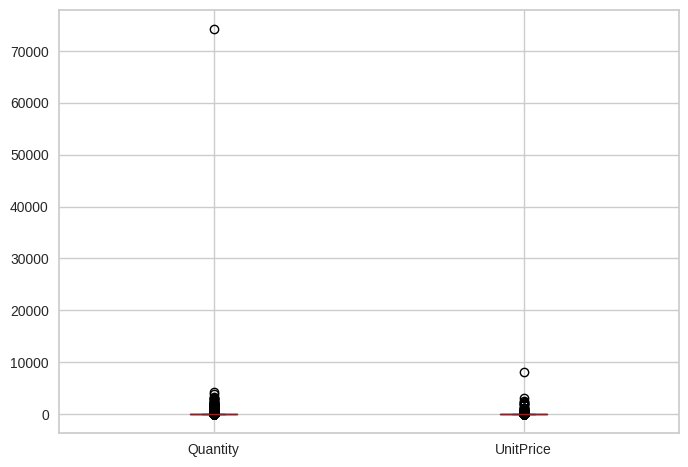

In [19]:
df[['Quantity','UnitPrice']].plot.box()

In [20]:
df.query('Quantity>10_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom


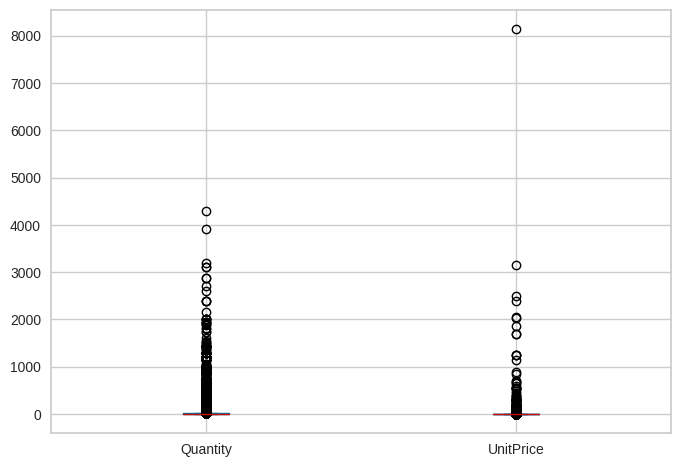

In [21]:
df.query('Quantity<10_000')[['Quantity','UnitPrice']].plot.box();

In [22]:
df.query('UnitPrice>8_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [23]:
df = df.query('Quantity<10_000 & UnitPrice<8_000')

In [24]:
df['Price_total'] = df.Quantity * df.UnitPrice

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


RFM

In [26]:
pd.Timestamp.today()

Timestamp('2023-09-30 16:45:43.764067')

In [27]:
# Como a base possui dados de mais de 10 anos atrás, não faz sentido calcular a Recencia com a data de agora

In [28]:
df_rfmActual = (
  df.groupby('CustomerID')
  .agg(
      R = ('InvoiceDate', lambda x: (pd.Timestamp.today() - x.max()).days),
      F = ('InvoiceNo', 'nunique'),
      M = ('Price_total', 'mean')
  )
)

df_rfmActual.head()

,R,F,M
CustomerID,,,
12347,4442,5,22.506935
12348,4388,4,57.975484
12350,4623,1,19.670588
12352,4385,7,31.347286
12353,4516,1,22.250000


In [29]:
pd.Timestamp('2012-01-01')

Timestamp('2012-01-01 00:00:00')

In [30]:
df_rfm = (
  df.groupby('CustomerID')
  .agg(
      R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
      F = ('InvoiceNo', 'nunique'),
      M = ('Price_total', 'mean')
  )
)

df_rfm

,R,F,M
CustomerID,,,
12347,151,5,22.506935
12348,97,4,57.975484
12350,332,1,19.670588
12352,94,7,31.347286
12353,226,1,22.250000
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,148,1,14.315714


<Axes: >

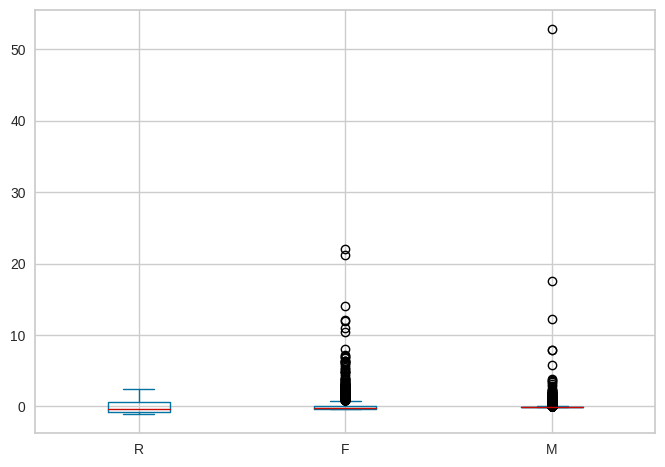

In [31]:
df_rfm.apply(scale).plot.box()

In [32]:
df_rfm.apply(scale).query('M>50')

,R,F,M
CustomerID,,,
15098,0.259986,-0.106925,52.822933


In [33]:
df.query('CustomerID==15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price_total
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


<Axes: >

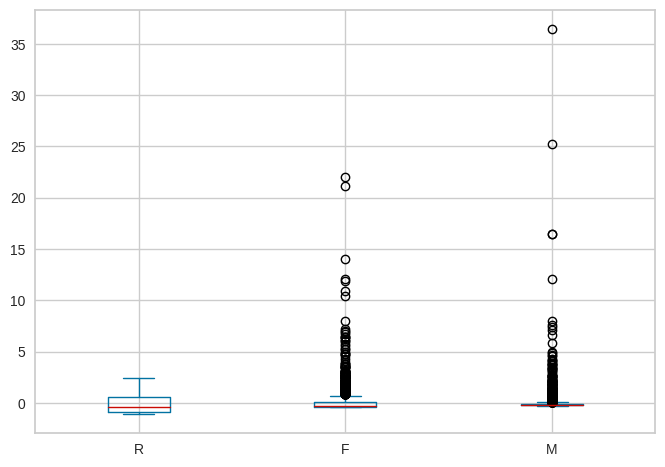

In [34]:
df_rfm = df_rfm.drop(15098)
df_rfm.apply(scale).plot.box()

In [35]:
from sklearn.preprocessing import PowerTransformer

In [36]:
scaler = PowerTransformer()

In [37]:
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index=df_rfm.index, columns=df_rfm.columns)
df_rfm_scaled.head()

,R,F,M
CustomerID,,,
12347,-0.046832,1.075357,0.315510
12348,-1.235375,0.852238,1.315104
12350,1.450740,-1.075407,0.151333
12352,-1.331620,1.358584,0.695571
12353,0.803743,-1.075407,0.301735


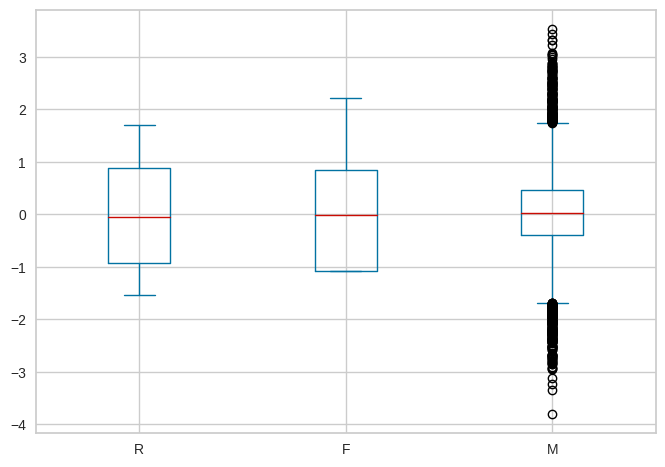

In [38]:
df_rfm_scaled.plot.box();

In [40]:
# Se quisermos reverter a transformação podemos utilizar
df_rfm_scaledRe = scaler.inverse_transform(df_rfm_scaled)
df_rfm_scaledRe

array([[151.        ,   5.        ,  22.50693548],
       [ 97.        ,   4.        ,  57.97548387],
       [332.        ,   1.        ,  19.67058824],
       ...,
       [148.        ,   1.        ,  14.31571429],
       [117.        ,  10.        ,   2.50709172],
       [223.        ,   1.        ,  26.38896552]])

In [41]:
df_rfm.describe()

,R,F,M
count,3638.000000,3638.000000,3638.000000
mean,181.306762,3.658604,34.951245
std,87.285728,6.159461,121.273473
min,88.000000,1.000000,1.450000
25%,108.000000,1.000000,12.927875
50%,151.000000,2.000000,17.834856
75%,237.000000,4.000000,25.480556
max,395.000000,139.000000,4453.430000


In [44]:
# Devida o alto delta entre as medianas e os valores máximos, iremos criar um teto aceitável onde mitigaremos essa discrepância
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper= x.quantile(.95)))
df_rfm_clip.describe()

,R,F,M
count,3638.000000,3638.000000,3638.000000
mean,179.919461,3.110775,24.512843
std,84.156644,2.826791,22.024170
min,88.000000,1.000000,1.450000
25%,108.000000,1.000000,12.927875
50%,151.000000,2.000000,17.834856
75%,237.000000,4.000000,25.480556
max,359.000000,11.000000,95.829375


In [45]:
df_rfm_clip_scaled = df_rfm_clip.apply(scale)

**Modeling & Model evaluation**

**Modelo 1: K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

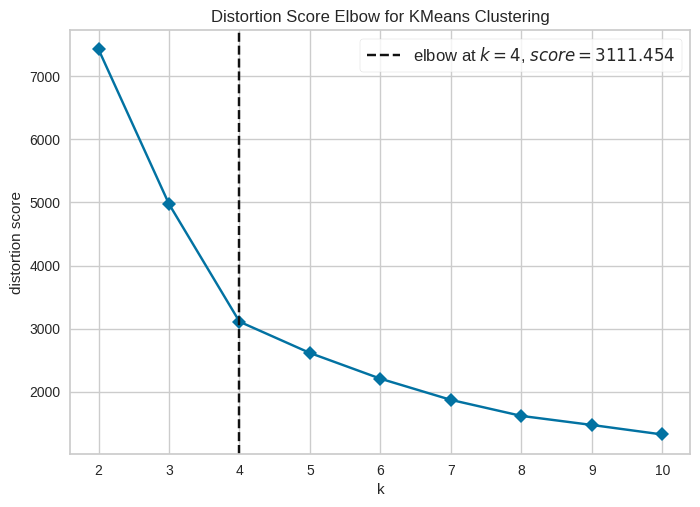

In [48]:
# Calculando o número ideal de grupos
kelbow_visualizer(KMeans(), df_rfm_clip_scaled, k=10, timings=False);

In [49]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,7422.350560,0.341080,1.157700,1710.462202
3,4973.398319,0.397052,0.906519,2170.964138
4,3111.450788,0.445487,0.741641,3037.655100
5,2615.817894,0.451787,0.737761,2881.249461
6,2208.738762,0.367168,0.876759,2862.946888
7,1873.224601,0.369996,0.858939,2920.737791
8,1619.550051,0.374717,0.891553,2976.034106
9,1439.994207,0.383303,0.808676,2984.488310
10,1325.298055,0.347510,0.880509,2916.608267


In [ ]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled);

In [52]:
# Como são apenas 3 váriáveis podemos fazer um gráfico 3D
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

**Modelo 2: Hierarchical Clustering**

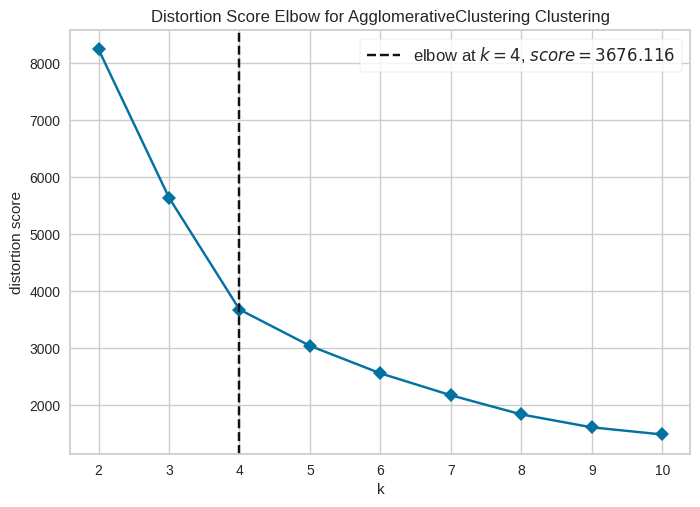

In [53]:
kelbow_visualizer(AgglomerativeClustering(), df_rfm_clip_scaled, k=10, timings=False);

In [54]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.297743,0.908351,1180.905245
3,0.373889,0.886538,1700.931403
4,0.391878,0.824152,2384.987773
5,0.401741,0.750915,2353.780959
6,0.321333,0.923441,2374.412654
7,0.339549,0.929285,2435.812214
8,0.344594,0.914209,2564.657109
9,0.350943,0.840881,2622.949915
10,0.317298,0.891080,2561.627401


In [55]:
hclust = AgglomerativeClustering(n_clusters=5)
hclust_labels = hclust.fit_predict(df_rfm_clip_scaled)

In [56]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=hclust_labels.astype(str), template='plotly_dark')

**Modelo 3: Gaussian Mixture**

In [57]:
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = df_rfm_clip_scaled.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
30,-5683.198330,8,diag
28,-3828.603387,8,full
24,150.752093,7,full
26,4420.661266,7,diag
22,4632.950518,6,diag


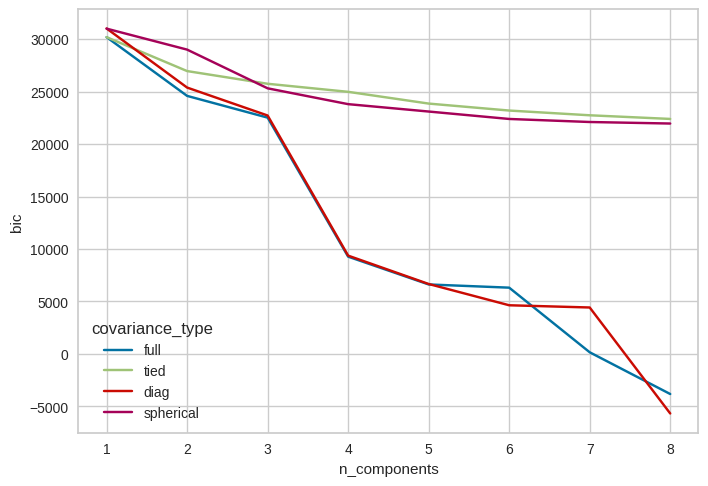

In [58]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [59]:
mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(df_rfm_clip_scaled)

In [60]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=mclust_labels.astype(str), template='plotly_dark')

In [ ]:
# O último modelo não trouxe uma separação objetivamente clara e intuitiva do grupo 4, por isso, será descartado

**Interpretação dos clusters**

In [61]:
# Calculando os centróides
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_clip_scaled.columns)

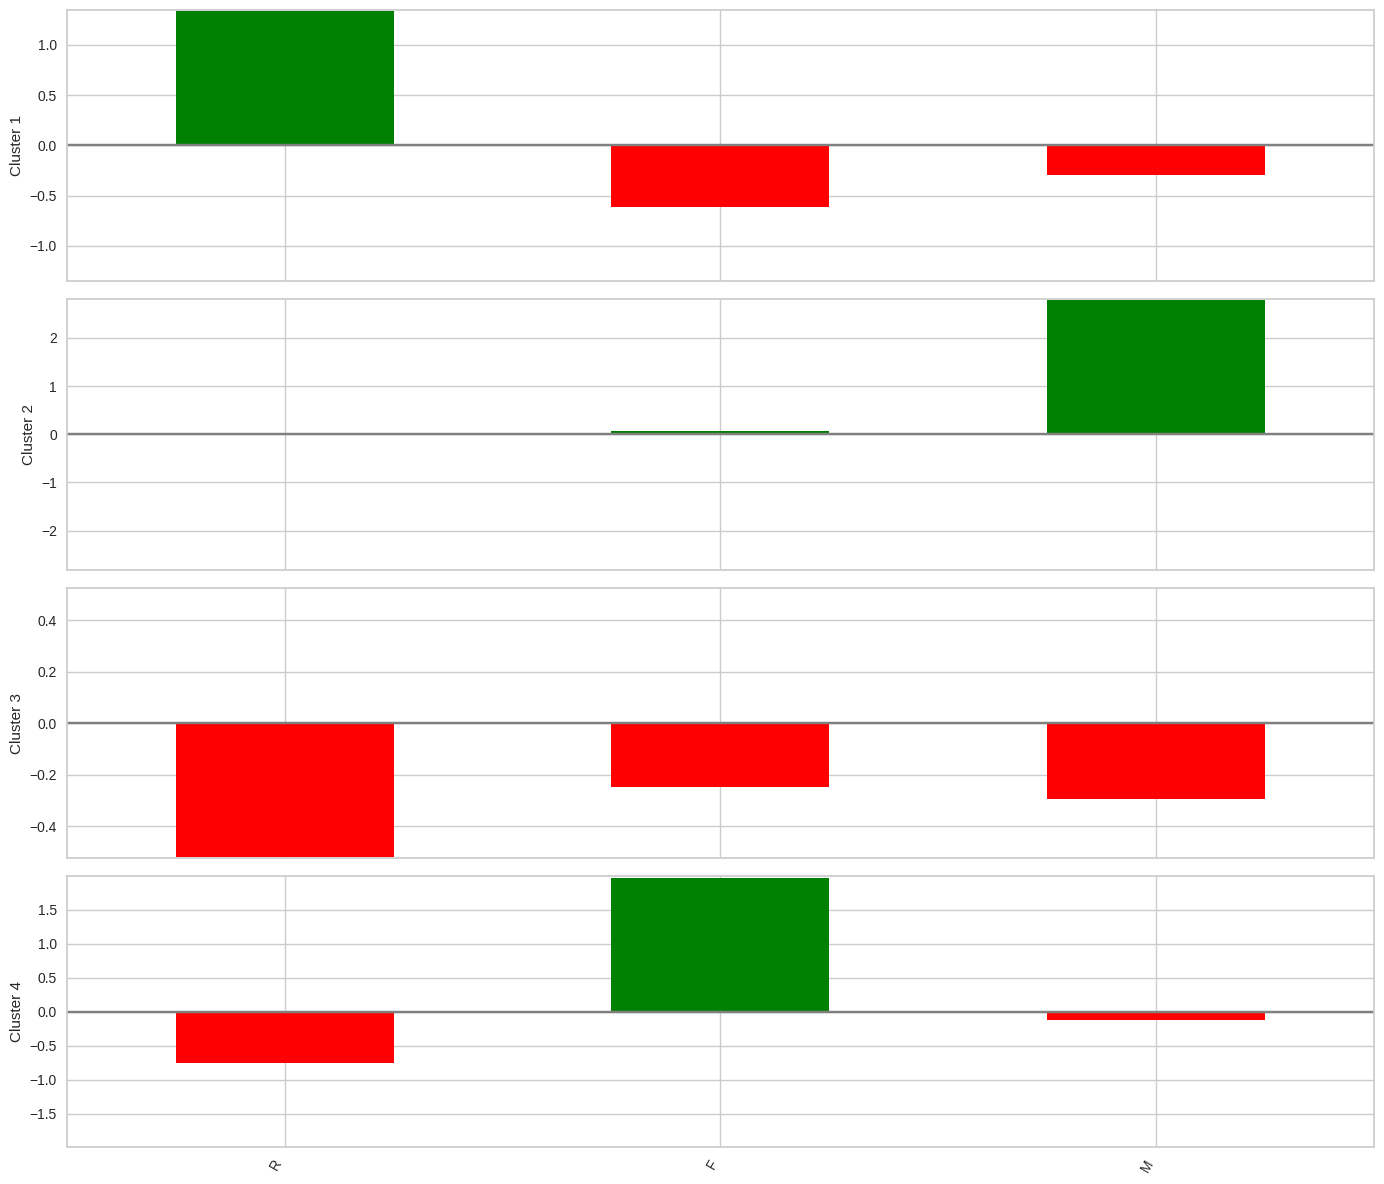

In [62]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [63]:
(
  df_rfm_clip.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
R,291.990973,181.809375,135.997219,116.118547
F,1.391174,3.328125,2.404894,8.682600
M,17.983396,85.768545,18.030936,21.764285
